# 📈 LSTM untuk Prediksi Jumlah Subscriber T-Series
Notebook ini menggunakan data hasil scraping untuk memprediksi jumlah subscriber T-Series dengan LSTM.

Disertai evaluasi menggunakan **Root Mean Square Error (RMS)**.

In [27]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [28]:
# Step 2: Load Data
file_path = "C:/Users/naufa/Downloads/testing/BIGDATA2.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8-sig')

In [29]:
# Step 3: Data Cleaning
df["Subscribers"] = df["Subscribers"].str.replace(",", "").astype(int)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df = df[df["Channel"] == "tseries"]
df = df.sort_values("Timestamp").reset_index(drop=True)

C:\Users\naufa\AppData\Local\Temp\ipykernel_24124\2508785802.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Timestamp"] = pd.to_datetime(df["Timestamp"])


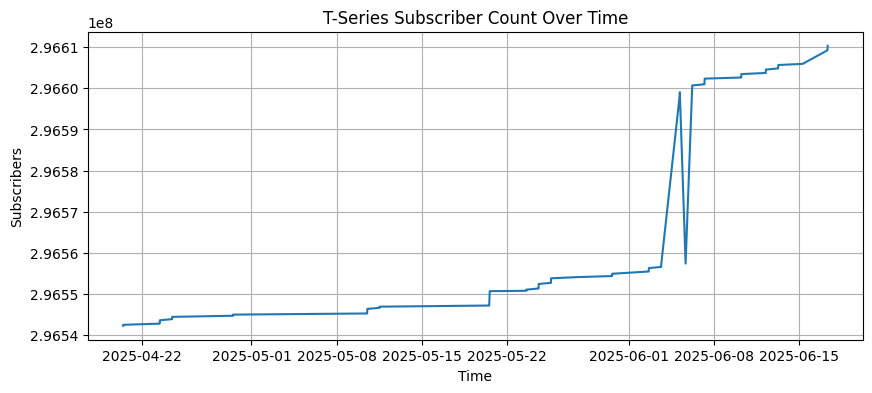

In [30]:
# Step 4: Plot Raw Data
plt.figure(figsize=(10,4))
plt.plot(df["Timestamp"], df["Subscribers"])
plt.title("T-Series Subscriber Count Over Time")
plt.xlabel("Time")
plt.ylabel("Subscribers")
plt.grid()
plt.show()

In [31]:
# Step 5: Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[["Subscribers"]].values)

In [32]:
# Step 6: Split Sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

seq_len = 10
X, y = create_sequences(scaled_data, seq_len)

In [33]:
# Step 7: Split Train/Test
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [34]:
# Step 8: Build LSTM Model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(seq_len, 1)))
model.add(LSTM(units=32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\naufa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 9: Train Model
history = model.fit(X_train, y_train, epochs=60, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - loss: 0.1898 - val_loss: 0.3550
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1099 - val_loss: 0.0485
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0358 - val_loss: 0.0477
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0453 - val_loss: 0.0612
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0366 - val_loss: 0.0026
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0225 - val_loss: 0.0064
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0235 - val_loss: 0.0060
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0277 - val_loss: 9.6082e-04
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.0213 - val_loss: 0.0204
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0303 - val_loss: 0.0361
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0214 - val_loss: 0.0194
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0215 

In [36]:
# Step 10: Predict
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step


In [37]:
# Step 11: Evaluate - RMS Error
rms = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"Root Mean Square Error (RMS): {rms:.2f}")

Root Mean Square Error (RMS): 3469.44


In [38]:
rmse = 2356.28
mean_subscriber = 296_600_000  # dari dataset kamu
relative_error = (rmse / mean_subscriber) * 100
print(f"Relative Error: {relative_error:.5f}%")

Relative Error: 0.00079%


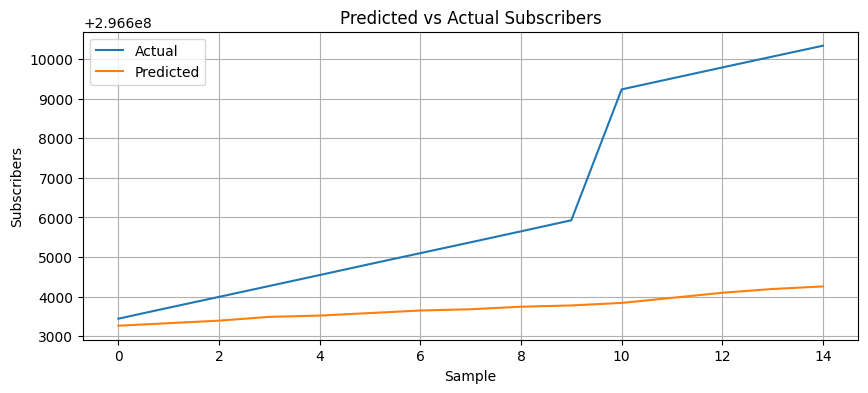

In [39]:
# Step 12: Plot Prediction vs Real
plt.figure(figsize=(10,4))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Predicted vs Actual Subscribers")
plt.xlabel("Sample")
plt.ylabel("Subscribers")
plt.legend()
plt.grid()
plt.show()